In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [29]:
#Define file location of downloaded SFR18_2017_Institution_subject_data dataset
SFR_data_fileloc = 'SFR18_2017_Institution_subject_data.csv'
#Read SFR18_2017_Institution_subject_data.csv into pandas
SFR18_2017_Institution_subject_data = pd.read_csv(SFR_data_fileloc, low_memory=False)
#Assign short name 'SFR_data' to database
SFR_data = SFR18_2017_Institution_subject_data
#Convert columns to proper data types
cols = ['grads','lowerAnnEarn' , 'medianAnnEarn', 'upperAnnEarn' , 'prAttBand']
SFR_data[cols] = SFR_data[cols].apply(pd.to_numeric, errors='coerce')
#Check that database has loaded
SFR_data.head()

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
0,10000291,Anglia Ruskin University,East,Agriculture & related subjects,Female,1,30.0,x,x,x,...,x,x,20,9300.0,14400.0,19500.0,x,x,NaN,x
1,10007759,Aston University,West Midlands,Agriculture & related subjects,Female,1,NaN,.,.,.,...,.,.,.,NaN,NaN,NaN,.,.,NaN,.
2,10000571,Bath Spa University,South West,Agriculture & related subjects,Female,1,NaN,.,.,.,...,.,.,.,NaN,NaN,NaN,.,.,NaN,.
3,10007850,The University of Bath,South West,Agriculture & related subjects,Female,1,NaN,.,.,.,...,.,.,.,NaN,NaN,NaN,.,.,NaN,.
4,10007152,University of Bedfordshire,East,Agriculture & related subjects,Female,1,NaN,.,.,.,...,.,.,.,NaN,NaN,NaN,.,.,NaN,.


In [10]:
#Find mean median salaries by subject across university
mean_AnnEarn_by_subject = SFR_data.groupby(['subject'])['medianAnnEarn'].mean()
mean_AnnEarn_by_uni_and_subject = SFR_data.groupby(['providerName','subject'])['medianAnnEarn'].mean()

In [61]:
mean_AnnEarn_by_uni_and_subject.head()
type(mean_AnnEarn_by_uni_and_subject)

pandas.core.series.Series

In [58]:
SFR_provider_list = list(SFR_data.providerName.unique())
SFR_subject_list = list(SFR_data.subject.unique())

In [59]:
SFR_subject_list_uni = SFR_subject_list[:]
SFR_subject_list_uni.insert(0,'providerName')

In [31]:
a = SFR_data[(SFR_data['providerName'] == 'Aberystwyth University') & (SFR_data['subject'] == 'Agriculture & related subjects')]['medianAnnEarn'].mean()
a

17150.0

In [149]:
#Create Dataframe containing mean median AnnEarn by subject for each university
Mean_subject_earnings = pd.DataFrame(columns=SFR_subject_list_uni)
for u in range(len(SFR_provider_list)):
    providerMeans = list(SFR_data[SFR_data['providerName'] == SFR_provider_list[u]].groupby(['subject'])['medianAnnEarn'].mean())
    providerMeans.insert(0, SFR_provider_list[u])
    Mean_subject_earnings.loc[len(Mean_subject_earnings)] = providerMeans
Mean_subject_earnings

,providerName,Agriculture & related subjects,Architecture building & planning,Biological sciences,Business & administrative studies,Combined,Computer science,Creative arts & design,Economics,Education,...,Law,Mass communications & documentation,Mathematical sciences,Medicine & Dentistry,Nursing,Physical sciences,Psychology,Social studies (excluding economics),Subjects allied to medicine (excluding nursing),Veterinary science
0,Anglia Ruskin University,14400.000000,35044.444444,18500.000000,21222.222222,NaN,21588.888889,16022.222222,NaN,23112.500000,...,20000.000000,16966.666667,NaN,NaN,27637.500000,18740.000000,17600.000000,20211.111111,26150.000000,NaN
1,Aston University,NaN,28450.000000,20422.222222,30155.555556,NaN,26450.000000,NaN,NaN,NaN,...,NaN,NaN,23840.000000,NaN,NaN,NaN,21150.000000,23033.333333,32511.111111,NaN
2,Bath Spa University,NaN,NaN,17000.000000,20200.000000,NaN,NaN,16777.777778,NaN,20071.428571,...,NaN,18625.000000,NaN,NaN,NaN,20433.333333,18850.000000,16983.333333,18183.333333,NaN
3,The University of Bath,NaN,27000.000000,23011.111111,38900.000000,27320.000000,30300.000000,NaN,40655.555556,22100.000000,...,NaN,NaN,33011.111111,NaN,NaN,25966.666667,24283.333333,27088.888889,32255.555556,NaN
4,University of Bedfordshire,NaN,30700.000000,19811.111111,18755.555556,NaN,22150.000000,15800.000000,NaN,22977.777778,...,17050.000000,16385.714286,NaN,NaN,25914.285714,14500.000000,16914.285714,19811.111111,13677.777778,NaN
5,Birkbeck College,NaN,NaN,24100.000000,32716.666667,NaN,NaN,NaN,50550.000000,NaN,...,30188.888889,22900.000000,NaN,NaN,NaN,24550.000000,24733.333333,27050.000000,NaN,NaN
6,Birmingham City University,NaN,25733.333333,NaN,19433.333333,NaN,20787.500000,16388.888889,NaN,24011.111111,...,17644.444444,18277.777778,NaN,NaN,29900.000000,NaN,16425.000000,19800.000000,24911.111111,NaN
7,The University of Birmingham,NaN,25200.000000,22755.555556,27677.777778,NaN,31600.000000,18911.111111,31100.000000,20187.500000,...,22844.444444,23800.000000,27988.888889,41811.111111,26033.333333,24500.000000,20242.857143,23811.111111,26688.888889,NaN
8,University College Birmingham,22411.111111,NaN,12833.333333,18233.333333,NaN,NaN,17900.000000,NaN,16366.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17533.333333,NaN
9,Bishop Grosseteste University,NaN,NaN,12500.000000,NaN,NaN,NaN,15433.333333,NaN,20422.222222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17050.000000,NaN,NaN


In [142]:
AllProviderMeans = SFR_data.groupby(['subject'])['medianAnnEarn'].mean()
AllProviderMeans

subject
Agriculture & related subjects                     19538.048780
Architecture building & planning                   25740.700219
Biological sciences                                20394.769874
Business & administrative studies                  23876.959847
Combined                                           21459.803922
Computer science                                   25129.349270
Creative arts & design                             17025.886865
Economics                                          29847.716895
Education                                          21672.032520
Engineering & technology                           27883.382353
English studies                                    19650.064516
Historical & philosophical studies                 20109.226933
Languages (excluding English studies)              22132.790224
Law                                                22218.978102
Mass communications & documentation                19005.706134
Mathematical sciences           

In [150]:
Differential_Earnings = Mean_subject_earnings
Differential_Earnings

,providerName,Agriculture & related subjects,Architecture building & planning,Biological sciences,Business & administrative studies,Combined,Computer science,Creative arts & design,Economics,Education,...,Law,Mass communications & documentation,Mathematical sciences,Medicine & Dentistry,Nursing,Physical sciences,Psychology,Social studies (excluding economics),Subjects allied to medicine (excluding nursing),Veterinary science
0,Anglia Ruskin University,14400.000000,35044.444444,18500.000000,21222.222222,NaN,21588.888889,16022.222222,NaN,23112.500000,...,20000.000000,16966.666667,NaN,NaN,27637.500000,18740.000000,17600.000000,20211.111111,26150.000000,NaN
1,Aston University,NaN,28450.000000,20422.222222,30155.555556,NaN,26450.000000,NaN,NaN,NaN,...,NaN,NaN,23840.000000,NaN,NaN,NaN,21150.000000,23033.333333,32511.111111,NaN
2,Bath Spa University,NaN,NaN,17000.000000,20200.000000,NaN,NaN,16777.777778,NaN,20071.428571,...,NaN,18625.000000,NaN,NaN,NaN,20433.333333,18850.000000,16983.333333,18183.333333,NaN
3,The University of Bath,NaN,27000.000000,23011.111111,38900.000000,27320.000000,30300.000000,NaN,40655.555556,22100.000000,...,NaN,NaN,33011.111111,NaN,NaN,25966.666667,24283.333333,27088.888889,32255.555556,NaN
4,University of Bedfordshire,NaN,30700.000000,19811.111111,18755.555556,NaN,22150.000000,15800.000000,NaN,22977.777778,...,17050.000000,16385.714286,NaN,NaN,25914.285714,14500.000000,16914.285714,19811.111111,13677.777778,NaN
5,Birkbeck College,NaN,NaN,24100.000000,32716.666667,NaN,NaN,NaN,50550.000000,NaN,...,30188.888889,22900.000000,NaN,NaN,NaN,24550.000000,24733.333333,27050.000000,NaN,NaN
6,Birmingham City University,NaN,25733.333333,NaN,19433.333333,NaN,20787.500000,16388.888889,NaN,24011.111111,...,17644.444444,18277.777778,NaN,NaN,29900.000000,NaN,16425.000000,19800.000000,24911.111111,NaN
7,The University of Birmingham,NaN,25200.000000,22755.555556,27677.777778,NaN,31600.000000,18911.111111,31100.000000,20187.500000,...,22844.444444,23800.000000,27988.888889,41811.111111,26033.333333,24500.000000,20242.857143,23811.111111,26688.888889,NaN
8,University College Birmingham,22411.111111,NaN,12833.333333,18233.333333,NaN,NaN,17900.000000,NaN,16366.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17533.333333,NaN
9,Bishop Grosseteste University,NaN,NaN,12500.000000,NaN,NaN,NaN,15433.333333,NaN,20422.222222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17050.000000,NaN,NaN


In [151]:

for s in range(len(SFR_subject_list)):
    Differential_Earnings[SFR_subject_list[s]] = Differential_Earnings[SFR_subject_list[s]].apply(lambda x: x - AllProviderMeans[s])
Differential_Earnings

,providerName,Agriculture & related subjects,Architecture building & planning,Biological sciences,Business & administrative studies,Combined,Computer science,Creative arts & design,Economics,Education,...,Law,Mass communications & documentation,Mathematical sciences,Medicine & Dentistry,Nursing,Physical sciences,Psychology,Social studies (excluding economics),Subjects allied to medicine (excluding nursing),Veterinary science
0,Anglia Ruskin University,-5138.048780,9303.744226,-1894.769874,-2654.737625,NaN,-3540.460381,-1003.664643,NaN,1440.467480,...,-2218.978102,-2039.039467,NaN,NaN,83.716769,-3642.668501,-1889.646465,-1319.062181,2075.398936,NaN
1,Aston University,NaN,2709.299781,27.452348,6278.595709,NaN,1320.650730,NaN,NaN,NaN,...,NaN,NaN,-3351.581109,NaN,NaN,NaN,1660.353535,1503.160041,8436.510047,NaN
2,Bath Spa University,NaN,NaN,-3394.769874,-3676.959847,NaN,NaN,-248.109087,NaN,-1600.603949,...,NaN,-380.706134,NaN,NaN,NaN,-1949.335167,-639.646465,-4546.839959,-5891.267730,NaN
3,The University of Bath,NaN,1259.299781,2616.341237,15023.040153,5860.196078,5170.650730,NaN,10807.838661,427.967480,...,NaN,NaN,5819.530002,NaN,NaN,3583.998166,4793.686869,5558.715596,8180.954492,NaN
4,University of Bedfordshire,NaN,4959.299781,-583.658763,-5121.404291,NaN,-2979.349270,-1225.886865,NaN,1305.745257,...,-5168.978102,-2619.991848,NaN,NaN,-1639.497517,-7882.668501,-2575.360750,-1719.062181,-10396.823286,NaN
5,Birkbeck College,NaN,NaN,3705.230126,8839.706820,NaN,NaN,NaN,20702.283105,NaN,...,7969.910787,3894.293866,NaN,NaN,NaN,2167.331499,5243.686869,5519.826707,NaN,NaN
6,Birmingham City University,NaN,-7.366885,NaN,-4443.626514,NaN,-4341.849270,-636.997976,NaN,2339.078591,...,-4574.533658,-727.928356,NaN,NaN,2346.216769,NaN,-3064.646465,-1730.173293,836.510047,NaN
7,The University of Birmingham,NaN,-540.700219,2360.785681,3800.817931,NaN,6470.650730,1885.224246,1252.283105,-1484.532520,...,625.466342,4794.293866,797.307780,-131.593515,-1520.449898,2117.331499,753.210678,2280.937819,2614.287825,NaN
8,University College Birmingham,2873.062331,NaN,-7561.436541,-5643.626514,NaN,NaN,874.113135,NaN,-5305.365854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6541.267730,NaN
9,Bishop Grosseteste University,NaN,NaN,-7894.769874,NaN,NaN,NaN,-1592.553531,NaN,-1249.810298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4480.173293,NaN,NaN


In [152]:
#Clean data to contain only schools teaching subjects taught by 60% of schools
Clean_Differential_Earnings = Differential_Earnings
for s in range(len(SFR_subject_list)):
    if Clean_Differential_Earnings[SFR_subject_list[s]].isna().sum() > len(SFR_provider_list)*0.4:
        Clean_Differential_Earnings = Clean_Differential_Earnings.drop([SFR_subject_list[s]], axis=1)
Clean_Differential_Earnings = Clean_Differential_Earnings.dropna()
Clean_Differential_Earnings

,providerName,Biological sciences,Business & administrative studies,Computer science,Creative arts & design,Engineering & technology,English studies,Historical & philosophical studies,Law,Mass communications & documentation,Physical sciences,Psychology,Social studies (excluding economics),Subjects allied to medicine (excluding nursing)
0,Anglia Ruskin University,-1894.769874,-2654.737625,-3540.460381,-1003.664643,-1383.382353,-1837.564516,-4520.338044,-2218.978102,-2039.039467,-3642.668501,-1889.646465,-1319.062181,2075.398936
7,The University of Birmingham,2360.785681,3800.817931,6470.650730,1885.224246,1383.284314,2405.491039,1657.439734,625.466342,4794.293866,2117.331499,753.210678,2280.937819,2614.287825
12,Bournemouth University,2216.341237,2978.595709,3881.761842,5863.002024,3266.617647,-2550.064516,-1853.671377,481.021898,4205.404977,-2182.668501,735.353535,3880.937819,-2362.101064
14,The University of Brighton,1371.896792,723.040153,370.650730,807.446469,783.284314,1083.268817,-1509.226933,-547.549531,2349.849421,-1371.557390,793.686869,-585.728848,1080.954492
22,The University of Central Lancashire,-1150.325430,-5310.293180,-2407.127047,-1270.331309,-3850.049020,-1916.731183,-3909.226933,-4152.311436,805.404977,-3838.224056,-1711.868687,-3674.617737,-6474.601064
28,Coventry University,-1905.880986,-3210.293180,-3329.349270,1063.002024,338.839869,-3116.731183,-2025.893599,-3696.755880,-516.817245,-2493.779612,-577.146465,-1330.173293,-1096.823286
31,University of Cumbria,-83.658763,-4739.459847,-5809.349270,-1892.553531,10466.617647,766.602151,-609.226933,3881.021898,-3305.706134,-6682.668501,-3669.646465,-3163.506626,425.398936
33,University of Derby,-3128.103208,-4776.959847,-829.349270,-1214.775754,-1769.096639,-4116.731183,-4037.798361,-5141.200324,-1827.928356,-5071.557390,-2602.146465,-3185.728848,-2074.601064
44,The University of Greenwich,-228.103208,-3132.515403,-3540.460381,-836.997976,-2916.715686,378.506912,-2796.726933,-1318.978102,1027.627199,-632.668501,-689.646465,-2863.506626,-563.489953
47,University of Hertfordshire,494.119014,-965.848736,115.095175,1651.890913,359.474790,533.268817,-471.726933,-2630.089213,3194.293866,-720.168501,1922.853535,7907.326707,4480.954492


In [153]:
Clean_provider_list = list(Clean_Differential_Earnings['providerName'])
Clean_Differential_Earnings.drop('providerName', axis = 1).max() - Clean_Differential_Earnings.drop('providerName', axis = 1).min()

Biological sciences                                 7877.777778
Business & administrative studies                  17455.555556
Computer science                                   16472.222222
Creative arts & design                              8766.666667
Engineering & technology                           19250.000000
English studies                                     9916.071429
Historical & philosophical studies                  9855.555556
Law                                                15444.444444
Mass communications & documentation                 8755.555556
Physical sciences                                  13250.000000
Psychology                                          7870.000000
Social studies (excluding economics)               12070.833333
Subjects allied to medicine (excluding nursing)    27111.111111
dtype: float64

In [187]:
Clean_provider_list[0]

'Anglia Ruskin University'

In [154]:
#drop providerName for k-means clustering analysis
Clean_Differential_Earnings_NoName = Clean_Differential_Earnings.drop('providerName', axis = 1).values
Clean_Differential_Earnings_NoName

array([[-1.89476987e+03, -2.65473762e+03, -3.54046038e+03,
        -1.00366464e+03, -1.38338235e+03, -1.83756452e+03,
        -4.52033804e+03, -2.21897810e+03, -2.03903947e+03,
        -3.64266850e+03, -1.88964646e+03, -1.31906218e+03,
         2.07539894e+03],
       [ 2.36078568e+03,  3.80081793e+03,  6.47065073e+03,
         1.88522425e+03,  1.38328431e+03,  2.40549104e+03,
         1.65743973e+03,  6.25466342e+02,  4.79429387e+03,
         2.11733150e+03,  7.53210678e+02,  2.28093782e+03,
         2.61428783e+03],
       [ 2.21634124e+03,  2.97859571e+03,  3.88176184e+03,
         5.86300202e+03,  3.26661765e+03, -2.55006452e+03,
        -1.85367138e+03,  4.81021898e+02,  4.20540498e+03,
        -2.18266850e+03,  7.35353535e+02,  3.88093782e+03,
        -2.36210106e+03],
       [ 1.37189679e+03,  7.23040153e+02,  3.70650730e+02,
         8.07446469e+02,  7.83284314e+02,  1.08326882e+03,
        -1.50922693e+03, -5.47549531e+02,  2.34984942e+03,
        -1.37155739e+03,  7.93686869e

In [199]:
#Create k-means cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Clean_Differential_Earnings_NoName)
labels = kmeans.labels_

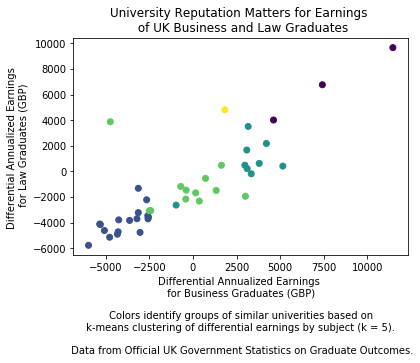

In [225]:
fig, ax = plt.subplots()
#scatter by business vs. engineering
ax.scatter(Clean_Differential_Earnings_NoName[:, 1], Clean_Differential_Earnings_NoName[:, 7], c=labels)
ax.set_xlabel("Differential Annualized Earnings \n for Business Graduates (GBP) \n \n Colors identify groups of similar univerities based on \n k-means clustering of differential earnings by subject (k = 5). \n \n Data from Official UK Government Statistics on Graduate Outcomes.")
ax.set_ylabel("Differential Annualized Earnings \n for Law Graduates (GBP)")
plt.title('University Reputation Matters for Earnings \n of UK Business and Law Graduates')
#plt.subtitle('Colors indicate similar universities by k-means clustering, ')
plt.show()